# 作業 : (Kaggle)房價預測

# [作業目標]
- 試著模仿範例寫法, 在房價預測中, 觀察去除離群值的影響

# [作業重點]
- 觀察將極端值以上下限值取代, 對於分布與迴歸分數的影響 (In[5], Out[5])
- 觀察將極端值資料直接刪除, 對於分布與迴歸分數的影響 (In[6], Out[6])

In [1]:
# 做完特徵工程前的所有準備 (與前範例相同)
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [2]:
data_path = 'data/'
df_train = pd.read_csv(data_path + 'house_train.csv.gz')

In [3]:
train_Y = np.log1p(df_train['SalePrice'])

In [4]:
df = df_train.drop(['Id', 'SalePrice'] , axis=1)

In [5]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#只取 int64, float64 兩種數值型欄位, 存於 num_features 中
num_features = []
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(feature)
print(f'{len(num_features)} Numeric Features : {num_features}\n')

36 Numeric Features : ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']



In [8]:
# 削減文字型欄位, 只剩數值型欄位
df = df[num_features]

In [9]:
df['1stFlrSF'].head(100)

0      856
1     1262
2      920
3      961
4     1145
5      796
6     1694
7     1107
8     1022
9     1077
10    1040
11    1182
12     912
13    1494
14    1253
15     854
16    1004
17    1296
18    1114
19    1339
20    1158
21    1108
22    1795
23    1060
24    1060
25    1600
26     900
27    1704
28    1600
29     520
      ... 
70    2223
71     845
72     885
73    1086
74     840
75     526
76     952
77    1072
78    1768
79     682
80    1182
81    1337
82    1563
83    1065
84     804
85    1301
86     684
87     612
88    1013
89     990
90    1040
91    1235
92     964
93    1260
94     905
95     680
96    1588
97     960
98     835
99    1225
Name: 1stFlrSF, Length: 100, dtype: int64

In [10]:
df['1stFlrSF'].value_counts()

864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
764      6
990      6
728      6
1056     6
840      6
882      6
1728     6
720      6
796      5
1494     5
1422     5
520      5
1072     5
1080     5
616      5
798      5
1236     5
958      5
        ..
1223     1
1225     1
1229     1
1235     1
1238     1
1240     1
1241     1
1242     1
1090     1
1244     1
1247     1
1248     1
1249     1
1251     1
1256     1
1260     1
1261     1
1265     1
1272     1
1274     1
1279     1
1281     1
1282     1
1283     1
1284     1
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

In [11]:
df = df.fillna(-1)

In [12]:
train_num = train_Y.shape[0]

In [13]:
MMEncoder = MinMaxScaler()

# 作業1
* 試著限制 '1樓地板面積(平方英尺)' (1stFlrSF) 欄位的上下限, 看看能否再進一步提高分數?

In [14]:
# 顯示 1stFlrSF 與目標值的散佈圖
import seaborn as sns
import matplotlib.pyplot as plt

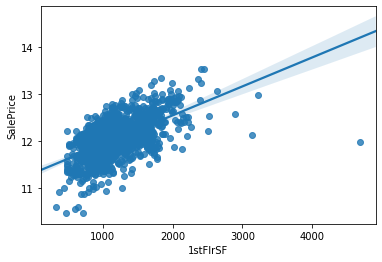

In [15]:
sns.regplot(x = df['1stFlrSF'][:train_num], y=train_Y)
plt.show()

In [16]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.846643681071632

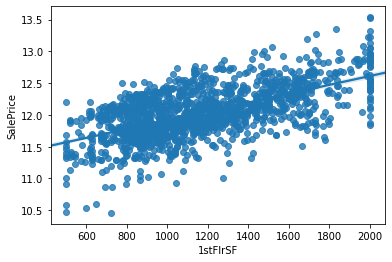

In [21]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 調整離群值
df['1stFlrSF'] = df['1stFlrSF'].clip(500, 2000)
sns.regplot(x = df['1stFlrSF'], y=train_Y)
plt.show()

In [22]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.876580486010791

# 作業2
* 續前題, 去除離群值有兩類方式 :  捨棄離群值(刪除離群的資料) 以及調整離群值,  
請試著用同樣的上下限, 改為 '捨棄離群值' 的方法, 看看結果會變好還是變差? 並試著解釋原因。

In [19]:
# 將 1stFlrSF 限制在你覺得適合的範圍內, 捨棄離群值
keep_indexs = (df['GrLivArea']> 800) & (df['GrLivArea']< 2500)
df = df[keep_indexs]
train_Y = train_Y[keep_indexs]
sns.regplot(x = df['GrLivArea'], y=train_Y)
plt.show()



'\nYour Code Here\n'

In [20]:
# 做線性迴歸, 觀察分數
train_X = MMEncoder.fit_transform(df)
estimator = LinearRegression()
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.846643681071632